In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data/stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X = df.drop(columns=['math_score'],axis = 1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [5]:
for col in df.columns:
    if df[col].dtype == 'O':
        print(f"The column name is  {col.upper()}  and it's unique values are =>  {df[col].unique()}")
    print()

The column name is  GENDER  and it's unique values are =>  ['female' 'male']

The column name is  RACE_ETHNICITY  and it's unique values are =>  ['group B' 'group C' 'group A' 'group D' 'group E']

The column name is  PARENTAL_LEVEL_OF_EDUCATION  and it's unique values are =>  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

The column name is  LUNCH  and it's unique values are =>  ['standard' 'free/reduced']

The column name is  TEST_PREPARATION_COURSE  and it's unique values are =>  ['none' 'completed']






In [6]:
y = df['math_score']

In [7]:
# Creating column transformer with 3 types of transformers 

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [8]:
X = preprocessor.fit_transform(X)

In [9]:
X.shape

(1000, 19)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [11]:
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [15]:
# function for calculating different metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse , rmse, r2_square
    

In [16]:

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoosting Regressor" : CatBoostRegressor(verbose = False),
    "AdaBoost Regressor" : AdaBoostRegressor()
}

In [19]:

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae ,model_train_mse,  model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae ,model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print("- Mean Sqaured Error: {:.4f}".format(model_train_mse))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    print("- R2 Score: {:.4f}".format(model_test_mse))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3467
- Mean Absolute Error: 4.2872
- R2 Score: 0.8732
- Mean Sqaured Error: 28.5870
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3259
- Mean Absolute Error: 4.1669
- R2 Score: 0.8834
- R2 Score: 28.3647


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
- Mean Sqaured Error: 43.4784
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253
- R2 Score: 42.5064


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
- Mean Sqaured Error: 28.3378
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806
- R2 Score: 29.0563


K-Neighbors R

In [20]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.883435
2,Ridge,0.880593
5,Random Forest Regressor,0.851941
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.848690
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783898
4,Decision Tree,0.761505


In [21]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.34


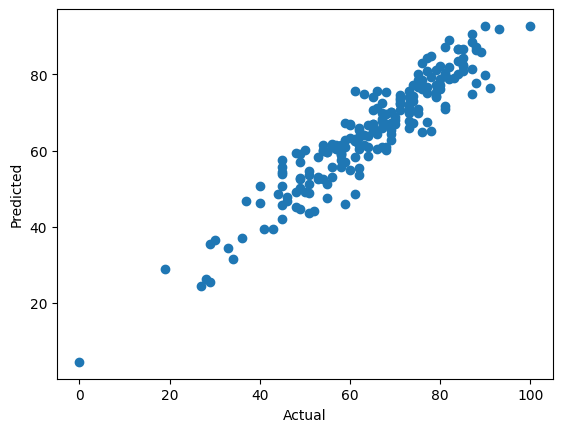

In [22]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='math_score'>

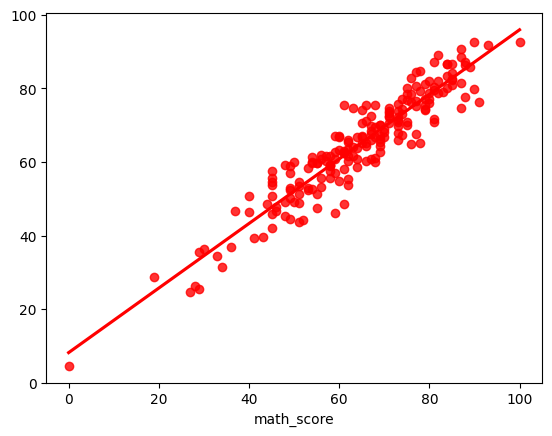

In [23]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [24]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.4375,14.5625
737,53,58.4375,-5.4375
740,80,77.1250,2.8750
660,74,77.1875,-3.1875
411,84,86.5625,-2.5625
...,...,...,...
408,52,44.1250,7.8750
332,62,61.5625,0.4375
208,74,67.2500,6.7500
613,65,67.0625,-2.0625
